# Import commands

In [1]:
!pip install opencv-python

     |████████████████████████████████| 53.9 MB 132 kB/s eta 0:00:01


In [142]:
pip install xgboost

     |████████████████████████████████| 1.8 MB 293 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier

# BINARY CLASSIFICATION

# Training Data Extraxtion

In [2]:
folder_path = '/Users/valayaramchandani/Downloads/trainpics'

In [3]:
label_folders = {'person': 1, 'airplane': 0, 'car': 0, 'dog': 0}

In [4]:
data=[]
#Main folder which contains 4 subfolders
for folder in os.listdir(folder_path):
    if folder in label_folders:
        label = label_folders[folder]
        folder_images = os.listdir(os.path.join(folder_path, folder))
        for image_name in folder_images:
            if not image_name.startswith('.') and image_name.endswith(('png')):
                image_path = os.path.join(folder_path, folder, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                      data.append([image,label])
                else:
                    print("Could not read image: " + image_path)


In [5]:
df = pd.DataFrame()
for i in range(len(data)):
    row = data[i][0].reshape(1,-1)
    row = row.flatten()
    row = np.append(row,data[i][1])
    df = df.append(pd.Series(row), ignore_index=True)

/var/folders/8v/4n20m59n1z7g8vbcnjym5g_r0000gn/T/ipykernel_75353/4120307329.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(row), ignore_index=True)
/var/folders/8v/4n20m59n1z7g8vbcnjym5g_r0000gn/T/ipykernel_75353/4120307329.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(row), ignore_index=True)


In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,68,65,67,70,66,71,71,67,73,73,...,130,126,131,130,126,131,130,126,131,0
1,53,58,57,47,51,50,63,66,66,42,...,130,144,156,129,143,155,128,142,154,0
2,51,83,76,58,97,89,67,108,100,60,...,141,143,153,143,146,155,145,148,157,0
3,203,200,202,205,202,204,207,202,204,206,...,72,72,72,87,87,87,115,113,115,0
4,44,59,78,42,56,74,39,53,72,48,...,22,21,21,21,21,21,20,20,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,93,67,43,102,91,73,143,115,89,152,...,146,109,74,143,108,74,144,107,73,0
1996,155,120,54,158,112,59,148,122,70,150,...,171,144,117,167,140,113,162,140,112,0
1997,102,108,107,103,109,104,111,112,104,109,...,115,120,118,115,120,118,115,120,118,0
1998,210,162,118,208,163,122,208,163,125,213,...,208,156,111,209,159,115,210,159,115,0


In [7]:
X = df.iloc[:,:-1]

In [8]:
y = df[3072]

In [9]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: 3072, Length: 2000, dtype: int64

# Validation Data Extraction

In [10]:
folder_path_val = '/Users/valayaramchandani/Downloads/valpics'
label_folders = {'person': 1, 'airplane': 0, 'car': 0, 'dog': 0}
data_val=[]
#Main folder which contains 4 subfolders
for folder in os.listdir(folder_path_val):
    if folder in label_folders:
        label = label_folders[folder]
        folder_images = os.listdir(os.path.join(folder_path_val, folder))
        for image_name in folder_images:
            if not image_name.startswith('.') and image_name.endswith(('png')):
                image_path = os.path.join(folder_path_val, folder, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                      data_val.append([image,label])
                else:
                    print("Could not read image: " + image_path)

In [11]:
df_val = pd.DataFrame()
for i in range(len(data_val)):
    row = data_val[i][0].reshape(1,-1)
    row = row.flatten()
    row = np.append(row,data_val[i][1])
    df_val = df_val.append(pd.Series(row), ignore_index=True)

/var/folders/8v/4n20m59n1z7g8vbcnjym5g_r0000gn/T/ipykernel_75353/2174921034.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_val = df_val.append(pd.Series(row), ignore_index=True)
/var/folders/8v/4n20m59n1z7g8vbcnjym5g_r0000gn/T/ipykernel_75353/2174921034.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_val = df_val.append(pd.Series(row), ignore_index=True)


In [12]:
df_val

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,141,142,146,142,143,147,144,145,147,138,...,15,13,14,17,15,16,15,13,13,0
1,254,254,251,248,245,240,247,238,229,163,...,74,69,70,86,78,78,99,89,89,0
2,98,126,143,105,134,155,106,137,160,106,...,116,155,191,44,69,93,41,58,73,0
3,195,175,164,193,173,162,195,175,164,195,...,0,1,10,83,85,95,136,145,155,0
4,250,173,110,250,171,112,250,170,109,197,...,170,180,186,170,179,188,165,174,183,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,64,91,121,130,125,131,134,128,124,100,...,131,153,178,130,153,176,134,158,179,0
396,47,53,28,48,44,23,57,57,40,59,...,73,91,90,67,88,86,60,83,79,0
397,178,184,193,146,162,165,153,163,167,185,...,96,108,108,103,111,115,104,115,113,0
398,178,156,115,176,155,117,183,159,115,188,...,182,162,115,179,157,115,179,157,115,0


In [13]:
X_val = df_val.iloc[:,:-1]
y_val = df_val[3072]

In [14]:
X_val

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,141,142,146,142,143,147,144,145,147,138,...,16,15,13,14,17,15,16,15,13,13
1,254,254,251,248,245,240,247,238,229,163,...,56,74,69,70,86,78,78,99,89,89
2,98,126,143,105,134,155,106,137,160,106,...,216,116,155,191,44,69,93,41,58,73
3,195,175,164,193,173,162,195,175,164,195,...,9,0,1,10,83,85,95,136,145,155
4,250,173,110,250,171,112,250,170,109,197,...,118,170,180,186,170,179,188,165,174,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,64,91,121,130,125,131,134,128,124,100,...,171,131,153,178,130,153,176,134,158,179
396,47,53,28,48,44,23,57,57,40,59,...,83,73,91,90,67,88,86,60,83,79
397,178,184,193,146,162,165,153,163,167,185,...,136,96,108,108,103,111,115,104,115,113
398,178,156,115,176,155,117,183,159,115,188,...,115,182,162,115,179,157,115,179,157,115


In [15]:
y_val

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: 3072, Length: 400, dtype: int64

# Decision Tree Implementation - Gini Index

In [17]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        #For splitting conditions
        self.feature = feature
        self.threshold = threshold
        #For non-leaf node, describe their child node
        self.left = left
        self.right = right
        #For a leaf node - 
        self.value = value
        
class DecisionTree_gini:
    def __init__(self, max_depth=10, min_samples_split=7):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        
    #Fit function essentially needs to construct a tree. 
    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y))
        self.tree_ = self._grow_tree(X, y)
    
    #Returns the best feature and best threshold (X1 < t) or (X1 >= t)
    def _best_split(self, X, y):
        #No. of samples 
        m = y.size
        #No splitting reqd. if only 1 (or less) node
        if m <= 1 or m < self.min_samples_split:
            return None, None
        
        #num_parent[c] contains the number of samples in class c
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        #gini index has to be minimised
        best_gini = float('inf')
        best_feature, best_threshold = None, None
        
        #Iterate over each feature of X
        for feature in range(X.shape[1]):
            #Sort in ascending order and unpack in two lists
            thresholds, classes = zip(*sorted(zip(X.iloc[:, feature], y)))
            #Creating a list of two elements which will be updates (no. of 0s, no. of 1s)
            num_left = [0] * self.n_classes_
            #initially, all the samples are on the right side of the split
            num_right = num_parent.copy()
            
            #We iterate over all the possible splits, calculate gini index, and then decide. No. of splits = no. of samples
            for i in range(1, m):
                #classes[] has all the corresponding labels. We are adding the top element to the left node
                #And we are subtracting that top element from the right one
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.n_classes_))
                gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_))
                gini = (i * gini_left + (m - i) * gini_right) / m
                
                #If current threshold value is the same as the previous one, we dont do anything and move on to the next threshold value
                if thresholds[i] == thresholds[i - 1]:
                    continue
                
                
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = (thresholds[i] + thresholds[i - 1]) / 2
        #Suppose we iterate over all features, and still best_gini doesnt change        
        if best_gini == float('inf'):
            return None, None
        
        return best_feature, best_threshold
    
    #Recursively builds the decision tree based on the split returned by best split
    def _grow_tree(self, X, y, depth=0):
        #contains the number of samples that belong to each class in the current node. 
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        #predicted_class is the class that is most prevalent in the current node, 
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(value=predicted_class)
        
        if depth < self.max_depth:
            #Tree has scope to grow more
            feature, threshold = self._best_split(X, y)
            if feature is not None:
                #X[:, feature] < threshold generates a boolean array where 
                #the value is True if the value of that feature in that sample is less than the threshold, 
                #and False otherwise. The resulting indices_left array contains True values for the samples that 
                #belong to the left child, and False values for the samples that belong to the right child.
                indices_left = X.iloc[:, feature] < threshold
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                
                node = Node(feature=feature, threshold=threshold)
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
                
        return node
    def predict(self, X):
        X = np.array(X)
        y_pred = []
        for i in range(X.shape[0]):
            y_pred.append(self._predict(X[i]))
        return y_pred
    def _predict(self, inputs):
        node = self.tree_
        while node.left or node.right:
            if inputs[node.feature] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

# Decision Tree Implementation - Information Gain 

In [18]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        #For splitting conditions
        self.feature = feature
        self.threshold = threshold
        #For non-leaf node, describe their child node
        self.left = left
        self.right = right
        #For a leaf node - 
        self.value = value
        
class DecisionTree_info:
    def __init__(self, max_depth=10, min_samples_split=7):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        
    #Fit function essentially needs to construct a tree. 
    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y))
        self.tree_ = self._grow_tree(X, y)
    def _best_split(self, X, y):
        #No. of samples 
        m = y.size
        #No splitting reqd. if only 1 (or less) node
        if m <= 1:
            return None, None
        if m <= 1 or m < self.min_samples_split:
            return None, None
        #num_parent[c] contains the number of samples in class c
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        #information gain has to be maximized
        best_gain = -1.0
        best_feature, best_threshold = None, None
        
        #entropy of parent node
        entropy_parent = sum(-(num_parent[i]/m)*np.log2(num_parent[i]/m) if num_parent[i] != 0 else 0 for i in range(self.n_classes_))
        
        #Iterate over each feature of X
        for feature in range(X.shape[1]):
            #Sort in ascending order and unpack in two lists
            thresholds, classes = zip(*sorted(zip(X.iloc[:, feature], y)))
            #Creating a list of two elements which will be updates (no. of 0s, no. of 1s)
            num_left = [0] * self.n_classes_
            #initially, all the samples are on the right side of the split
            num_right = num_parent.copy()
            
            #We iterate over all the possible splits, calculate information gain, and then decide. No. of splits = no. of samples
            for i in range(1, m):
                #classes[] has all the corresponding labels. We are adding the top element to the left node
                #And we are subtracting that top element from the right one
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                entropy_left = sum(-(num_left[x]/i)*np.log2(num_left[x]/i) if num_left[x] != 0 else 0 for x in range(self.n_classes_))
                entropy_right = sum(-(num_right[x]/(m-i))*np.log2(num_right[x]/(m-i)) if num_right[x] != 0 else 0 for x in range(self.n_classes_))
                entropy = (i * entropy_left + (m - i) * entropy_right) / m
                gain = entropy_parent - entropy
                
                #If current threshold value is the same as the previous one, we dont do anything and move on to the next threshold value
                if thresholds[i] == thresholds[i - 1]:
                    continue
                
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = (thresholds[i] + thresholds[i - 1]) / 2
                    
        #Suppose we iterate over all features, and still best_gain doesnt change
        if best_gain == -1.0:
            return None, None
        
        return best_feature, best_threshold
    
    #Recursively builds the decision tree based on the split returned by best split
    def _grow_tree(self, X, y, depth=0):
        #contains the number of samples that belong to each class in the current node.
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        #predicted_class is the class that is most prevalent in the current node, 
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(value=predicted_class)
        
        if depth < self.max_depth:
            #Tree has scope to grow more
            feature, threshold = self._best_split(X, y)
            if feature is not None:
                #X[:, feature] < threshold generates a boolean array where 
                #the value is True if the value of that feature in that sample is less than the threshold, 
                #and False otherwise. The resulting indices_left array contains True values for the samples that 
                #belong to the left child, and False values for the samples that belong to the right child.
                
                """X[~indices_left]" selects the rows of the NumPy array or 
                Pandas DataFrame X for which the corresponding boolean value 
                in the boolean array "indices_left" is False."""
                
                indices_left = X.iloc[:, feature] < threshold
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                
                node = Node(feature=feature, threshold=threshold)
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
                
        return node
    def predict(self, X):
        X = np.array(X)
        y_pred = []
        for i in range(X.shape[0]):
            y_pred.append(self._predict(X[i]))
        return y_pred
    def _predict(self, inputs):
        node = self.tree_
        while node.left or node.right:
            if inputs[node.feature] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

In [19]:
t1 = DecisionTree_gini()

In [20]:
start_time_gini = time.time()
t1.fit(X, y)
train_time_gini = time.time() - start_time_gini

In [21]:
t2 = DecisionTree_info()
start_time_info = time.time()
t2.fit(X, y)
train_time_info = time.time() - start_time_info

In [22]:
train_time_gini

505.900178194046

In [23]:
train_time_info

783.336754322052

In [24]:
y_guess_1 = t1.predict(X_val)

In [25]:
y_guess_2 = t2.predict(X_val)

In [26]:
error = 0
for i in range(len(y_guess_1)):
    if(y_guess_1[i]!=y_val[i]):
        error = error + 1
accuracy = (1 - (error/len(y_guess_1)))*100
print("Accuracy of decision tree using gini index", accuracy)

Accuracy of decision tree using gini index 92.75


In [27]:
error = 0
for i in range(len(y_guess_2)):
    if(y_guess_2[i]!=y_val[i]):
        error = error + 1
accuracy = (1 - (error/len(y_guess_2)))*100
print("Accuracy of decision tree using information gain", accuracy)

Accuracy of decision tree using information gain 94.0


In [28]:
predicted_positives = 0
true_positives = 0
false_negative = 0
for i in range(len(y_guess_1)):
    if((y_val[i] == 1) & (y_guess_1[i] == 1)):
            true_positives = true_positives + 1
    if((y_val[i] == 1) & (y_guess_1[i] == 0)):
            false_negative = false_negative + 1            
    if(y_guess_1[i] == 1):   
         predicted_positives = predicted_positives + 1
rv = true_positives/(true_positives+false_negative)
prec = true_positives / predicted_positives
print("precision - ", prec*100)
print("recall value - ", rv*100)

precision -  88.17204301075269
recall value -  82.0


In [29]:
predicted_positives = 0
true_positives = 0
false_negative = 0
for i in range(len(y_guess_2)):
    if((y_val[i] == 1) & (y_guess_2[i] == 1)):
            true_positives = true_positives + 1
    if((y_val[i] == 1) & (y_guess_2[i] == 0)):
            false_negative = false_negative + 1            
    if(y_guess_2[i] == 1):   
         predicted_positives = predicted_positives + 1
rv = true_positives/(true_positives+false_negative)
prec = true_positives / predicted_positives
print("precision - ", prec*100)
print("recall value - ", rv*100)

precision -  85.18518518518519
recall value -  92.0


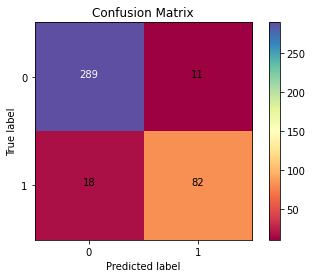

In [30]:
Accuracy = metrics.accuracy_score(y_val, y_guess_1)
confusion_matrix = metrics.confusion_matrix(y_val, y_guess_1)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

# Decision Tree Scikit Learn

In [32]:
dtc = DecisionTreeClassifier(max_depth=10, min_samples_split=7, criterion='gini')

In [33]:
start_time = time.time()
dtc.fit(X, y)
train_time = time.time() - start_time

In [34]:
train_time

8.07505488395691

In [35]:
val_preds = dtc.predict(X_val)

In [36]:
val_acc = accuracy_score(y_val, val_preds)
val_prec = precision_score(y_val, val_preds, average='weighted')
val_rec = recall_score(y_val, val_preds, average='weighted')

In [37]:
print("Validation Metrics:")
print(f"Accuracy: {val_acc:.4f}")
print(f"Precision: {val_prec:.4f}")
print(f"Recall: {val_rec:.4f}")

Validation Metrics:
Accuracy: 0.9250
Precision: 0.9238
Recall: 0.9250


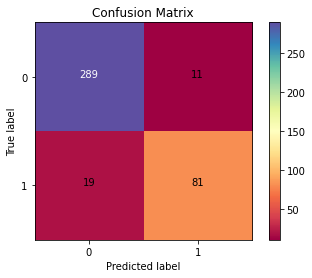

In [38]:
Accuracy = metrics.accuracy_score(y_val, val_preds)
confusion_matrix = metrics.confusion_matrix(y_val, val_preds)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

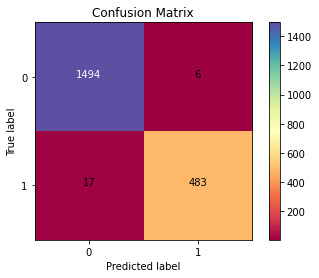

In [40]:
y_preds = dtc.predict(X)
Accuracy = metrics.accuracy_score(y, y_preds)
confusion_matrix = metrics.confusion_matrix(y, y_preds)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

In [41]:
dtc2 = DecisionTreeClassifier(max_depth=10, min_samples_split=7, criterion='entropy')

In [42]:
start_time = time.time()
dtc2.fit(X, y)
train_time = time.time() - start_time

In [43]:
train_time

5.662677049636841

In [47]:
val_preds = dtc2.predict(X_val)

In [48]:
val_acc = accuracy_score(y_val, val_preds)
val_prec = precision_score(y_val, val_preds, average='weighted')
val_rec = recall_score(y_val, val_preds, average='weighted')

In [49]:
print("Validation Metrics:")
print(f"Accuracy: {val_acc:.4f}")
print(f"Precision: {val_prec:.4f}")
print(f"Recall: {val_rec:.4f}")

Validation Metrics:
Accuracy: 0.9475
Precision: 0.9487
Recall: 0.9475


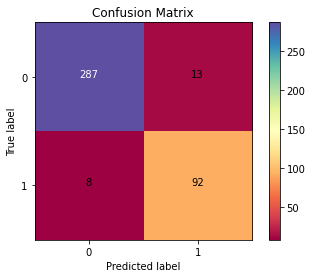

In [50]:
Accuracy = metrics.accuracy_score(y_val, val_preds)
confusion_matrix = metrics.confusion_matrix(y_val, val_preds)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

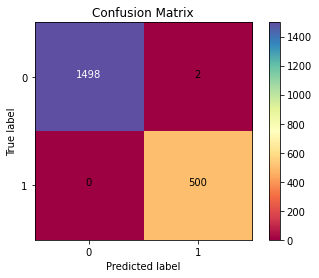

In [51]:
y_preds = dtc2.predict(X)
Accuracy = metrics.accuracy_score(y, y_preds)
confusion_matrix = metrics.confusion_matrix(y, y_preds)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

# Decision Tree Grid-Search and Visualisation

In [52]:
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)

In [53]:
X_new_df = pd.DataFrame(X_new, columns=X.columns[selector.get_support()])

In [54]:
X_new_df

,629,716,719,722,725,728,812,815,818,821
0,10,58,29,22,12,13,43,32,11,7
1,75,226,241,206,50,110,225,233,236,154
2,154,75,56,67,177,206,188,196,192,182
3,79,145,123,102,88,76,65,56,58,86
4,9,49,12,48,7,6,49,8,39,19
...,...,...,...,...,...,...,...,...,...,...
1995,87,82,88,84,87,85,92,87,84,85
1996,51,51,51,52,52,52,52,51,52,53
1997,106,110,109,106,108,109,114,109,109,108
1998,170,153,159,164,170,42,147,154,159,167


In [55]:
column_headers = list(X_new_df.columns.values)

In [56]:
x_val_new = pd.DataFrame()
for i in column_headers: 
    x_val_new[i] = X_val[i].values

In [57]:
x_val_new

,629,716,719,722,725,728,812,815,818,821
0,121,150,88,57,50,98,157,151,233,232
1,23,184,190,187,180,161,184,188,188,195
2,77,155,91,120,185,48,222,55,74,133
3,147,154,159,155,150,148,128,110,103,110
4,125,35,34,66,52,38,60,66,65,62
...,...,...,...,...,...,...,...,...,...,...
395,82,89,96,103,97,93,92,95,104,108
396,124,114,110,118,118,126,157,153,154,151
397,196,196,194,193,195,194,195,193,194,193
398,120,120,118,121,122,120,117,116,119,120


In [58]:
clf = DecisionTreeClassifier()
clf.fit(X_new_df, y)

DecisionTreeClassifier()

In [59]:
val_preds = clf.predict(x_val_new)

In [60]:
val_acc = accuracy_score(y_val, val_preds)
val_prec = precision_score(y_val, val_preds, average='weighted')
val_rec = recall_score(y_val, val_preds, average='weighted')

In [61]:
print("Validation Metrics:")
print(f"Accuracy: {val_acc:.4f}")
print(f"Precision: {val_prec:.4f}")
print(f"Recall: {val_rec:.4f}")

Validation Metrics:
Accuracy: 0.8525
Precision: 0.8495
Recall: 0.8525


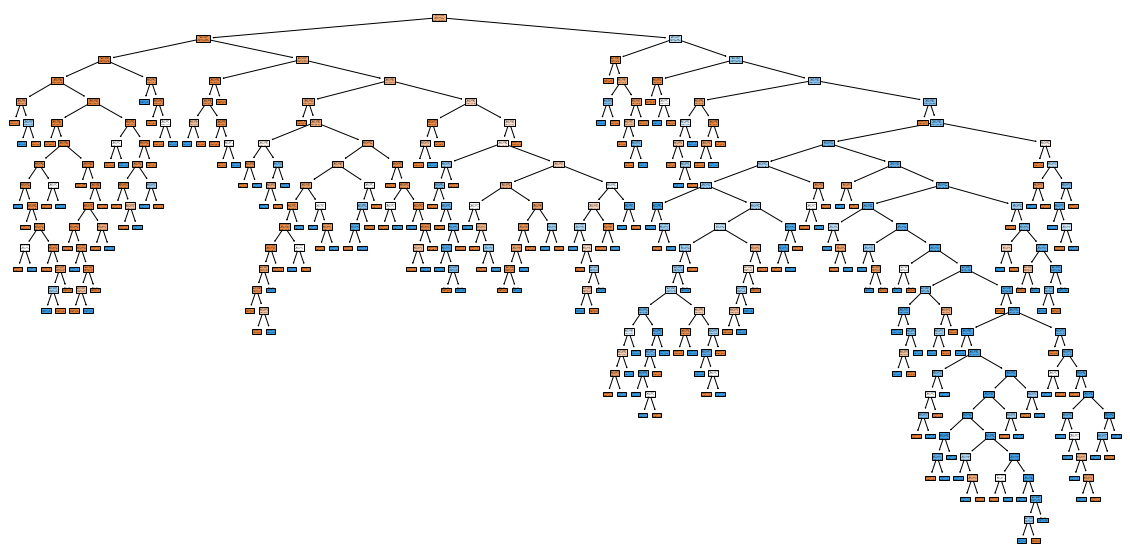

In [62]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True)
plt.show()

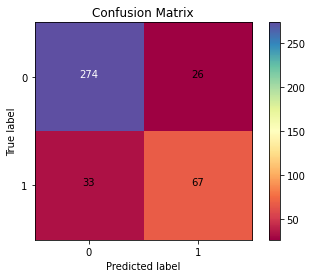

In [63]:
Accuracy = metrics.accuracy_score(y_val, val_preds)
confusion_matrix = metrics.confusion_matrix(y_val, val_preds)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

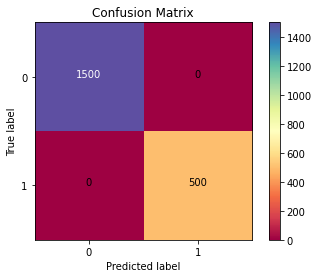

In [65]:
y_preds = clf.predict(X_new_df)
Accuracy = metrics.accuracy_score(y, y_preds)
confusion_matrix = metrics.confusion_matrix(y, y_preds)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

In [66]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 7, 10, 15],
    'min_samples_split': [2, 4, 7, 9]
}

In [67]:
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_new_df, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 7, 10, 15],
                         'min_samples_split': [2, 4, 7, 9]})

In [68]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_new_df, y)

# Evaluate the performance of the classifier on the training and validation sets
train_acc = best_clf.score(X_new_df, y)
val_acc = best_clf.score(x_val_new, y_val)

# Print the training and validation accuracies
print("Training accuracy: {:.2f}".format(train_acc))
print("Validation accuracy: {:.2f}".format(val_acc))

Training accuracy: 0.88
Validation accuracy: 0.88


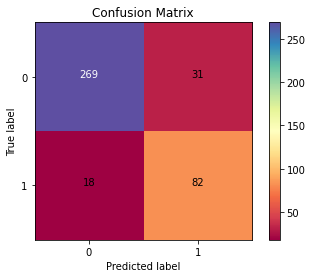

In [70]:
val_preds = best_clf.predict(x_val_new)
Accuracy = metrics.accuracy_score(y_val, val_preds)
confusion_matrix = metrics.confusion_matrix(y_val, val_preds)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

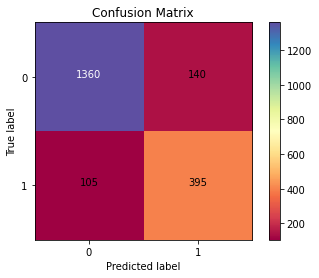

In [71]:

y_preds = best_clf.predict(X_new_df)
Accuracy = metrics.accuracy_score(y, y_preds)
confusion_matrix = metrics.confusion_matrix(y, y_preds)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

In [72]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


#  total impurity of leaves vs the effective alphas of pruned tree

In [74]:
#Effective alphas and total impurities at each step of the pruning process
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

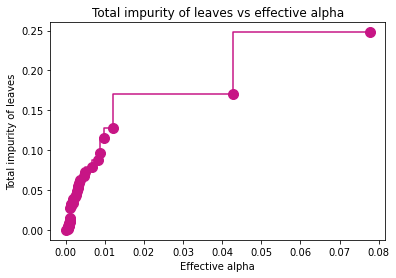

In [75]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', ms = 10, drawstyle="steps-pre",color="mediumvioletred")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total impurity of leaves vs effective alpha")
plt.show()

# number of nodes vs alpha and the depth of the tree vs alpha

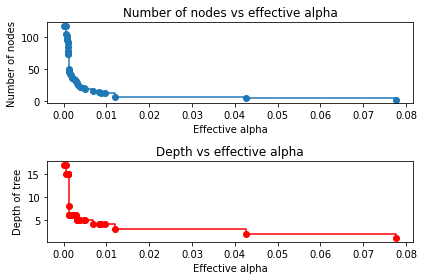

In [76]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X, y)
    clfs.append(clf)
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas[:-1], node_counts[:-1], marker='o', drawstyle="steps-post")
ax[0].set_xlabel("Effective alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs effective alpha")
ax[1].plot(ccp_alphas[:-1], depth[:-1], marker='o', drawstyle="steps-post",color="red")
ax[1].set_xlabel("Effective alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs effective alpha")
fig.tight_layout()
plt.show()

# training accuracy, validation accuracy, and test accuracy vs alpha.

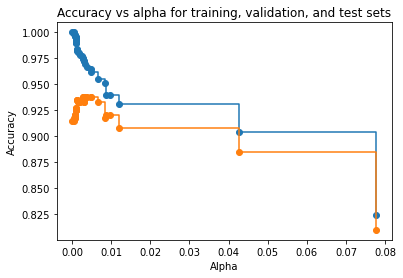

In [77]:
train_scores = [clf.score(X, y) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]
#test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training, validation, and test sets")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], val_scores[:-1], marker='o', label="validation", drawstyle="steps-post")
#ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o',

Training accuracy =  0.9755
Validation accuracy =  0.9375


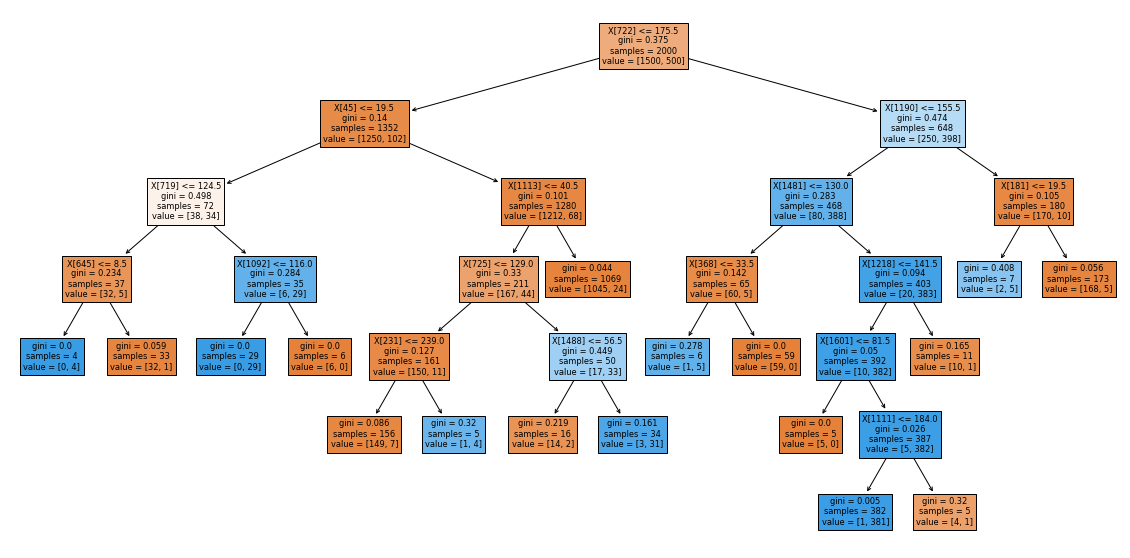

In [78]:
# Best performing tree
i = np.argmax(val_scores)
print("Training accuracy = ", train_scores[i])
print("Validation accuracy = ", val_scores[i])
plt.figure(figsize=(20,10))
plot_tree(clfs[i],filled=True)
plt.show()

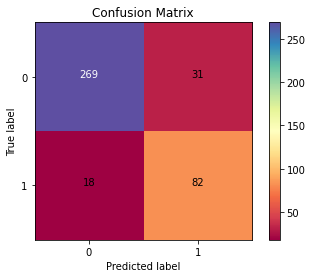

In [79]:
y_preds = clfs[i].predict(X_val)
Accuracy = metrics.accuracy_score(y_val, val_preds)
confusion_matrix = metrics.confusion_matrix(y_val, val_preds)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

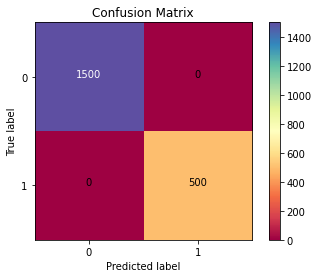

In [80]:
y_preds = clfs[i].predict(X)
Accuracy = metrics.accuracy_score(y, y_preds)
confusion_matrix = metrics.confusion_matrix(y, y_preds)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

# Random Forest (default)

In [81]:
rf = RandomForestClassifier()
rf.fit(X, y)

y_train_pred = rf.predict(X)
y_val_pred = rf.predict(X_val)

train_accuracy = accuracy_score(y, y_train_pred)
train_precision = precision_score(y, y_train_pred)
train_recall = recall_score(y, y_train_pred)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)

print("Training accuracy:", train_accuracy)
print("Training precision:", train_precision)
print("Training recall:", train_recall)

print("Validation accuracy:", val_accuracy)
print("Validation precision:", val_precision)
print("Validation recall:", val_recall)

Training accuracy: 1.0
Training precision: 1.0
Training recall: 1.0
Validation accuracy: 0.9675
Validation precision: 1.0
Validation recall: 0.87


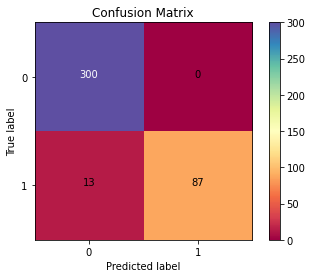

In [83]:
Accuracy = metrics.accuracy_score(y_val, y_val_pred)
confusion_matrix = metrics.confusion_matrix(y_val, y_val_pred)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

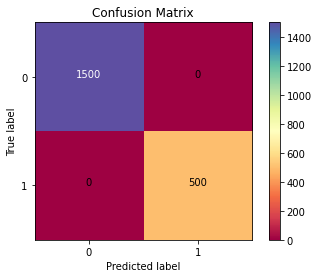

In [86]:
Accuracy = metrics.accuracy_score(y, y_train_pred)
confusion_matrix = metrics.confusion_matrix(y, y_train_pred)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

# Random Forest (grid-search)

In [87]:
param_grid = {
    'n_estimators': [80, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 7, 10],
    'min_samples_split': [5, 7, 10]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_train_pred = best_rf.predict(X)
y_val_pred = best_rf.predict(X_val)

train_accuracy = accuracy_score(y, y_train_pred)
train_precision = precision_score(y, y_train_pred)
train_recall = recall_score(y, y_train_pred)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)

print("Training accuracy:", train_accuracy)
print("Training precision:", train_precision)
print("Training recall:", train_recall)

print("Validation accuracy:", val_accuracy)
print("Validation precision:", val_precision)
print("Validation recall:", val_recall)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Training accuracy: 1.0
Training precision: 1.0
Training recall: 1.0
Validation accuracy: 0.975
Validation precision: 1.0
Validation recall: 0.9


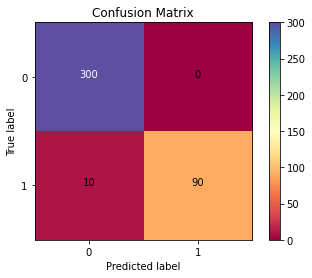

In [88]:
Accuracy = metrics.accuracy_score(y_val, y_val_pred)
confusion_matrix = metrics.confusion_matrix(y_val, y_val_pred)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

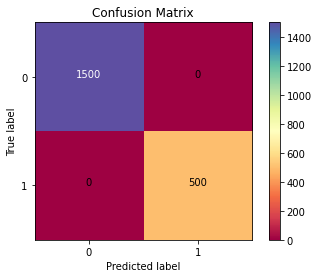

In [89]:
Accuracy = metrics.accuracy_score(y, y_train_pred)
confusion_matrix = metrics.confusion_matrix(y, y_train_pred)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

In [90]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


# Gradient Boosted Trees

In [91]:
rf = GradientBoostingClassifier()
rf.fit(X, y)

GradientBoostingClassifier()

In [92]:
y_train_pred = rf.predict(X)
y_val_pred = rf.predict(X_val)

train_accuracy = accuracy_score(y, y_train_pred)
train_precision = precision_score(y, y_train_pred)
train_recall = recall_score(y, y_train_pred)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)

print("Training accuracy:", train_accuracy)
print("Training precision:", train_precision)
print("Training recall:", train_recall)

print("Validation accuracy:", val_accuracy)
print("Validation precision:", val_precision)
print("Validation recall:", val_recall)

Training accuracy: 1.0
Training precision: 1.0
Training recall: 1.0
Validation accuracy: 0.9875
Validation precision: 0.9896907216494846
Validation recall: 0.96


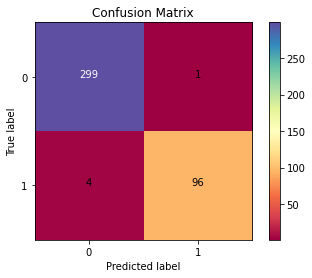

In [93]:
Accuracy = metrics.accuracy_score(y_val, y_val_pred)
confusion_matrix = metrics.confusion_matrix(y_val, y_val_pred)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

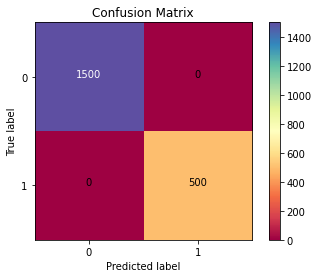

In [94]:
Accuracy = metrics.accuracy_score(y, y_train_pred)
confusion_matrix = metrics.confusion_matrix(y, y_train_pred)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

# Gradient Boost (Grid Search)

In [96]:
param_grid = {
    'n_estimators': [20,30,40,50],
    'subsample': [0.2,0.3,0.4,0.5,0.6],
    'max_depth': [5,6,7,8,9,10],
   
}
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_train_pred = best_rf.predict(X)
y_val_pred = best_rf.predict(X_val)

train_accuracy = accuracy_score(y, y_train_pred)
train_precision = precision_score(y, y_train_pred)
train_recall = recall_score(y, y_train_pred)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)

print("Training accuracy:", train_accuracy)
print("Training precision:", train_precision)
print("Training recall:", train_recall)

print("Validation accuracy:", val_accuracy)
print("Validation precision:", val_precision)
print("Validation recall:", val_recall)

Best parameters: {'max_depth': 10, 'n_estimators': 40, 'subsample': 0.5}
Training accuracy: 1.0
Training precision: 1.0
Training recall: 1.0
Validation accuracy: 0.9675
Validation precision: 0.9887640449438202
Validation recall: 0.88


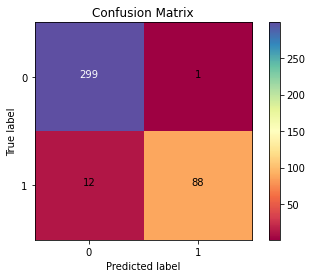

In [97]:
Accuracy = metrics.accuracy_score(y_val, y_val_pred)
confusion_matrix = metrics.confusion_matrix(y_val, y_val_pred)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

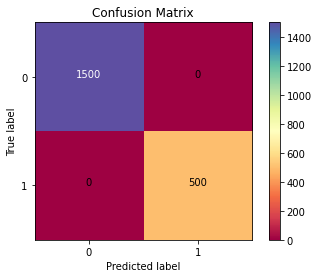

In [98]:
Accuracy = metrics.accuracy_score(y, y_train_pred)
confusion_matrix = metrics.confusion_matrix(y, y_train_pred)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

# XGBoost

In [27]:
rf = XGBClassifier()
start_time = time.time()
rf.fit(X, y)
train_time = time.time() - start_time
print(train_time)
y_train_pred = rf.predict(X)
y_val_pred = rf.predict(X_val)

train_accuracy = accuracy_score(y, y_train_pred)
train_precision = precision_score(y, y_train_pred)
train_recall = recall_score(y, y_train_pred)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)

print("Training accuracy:", train_accuracy)
print("Training precision:", train_precision)
print("Training recall:", train_recall)

print("Validation accuracy:", val_accuracy)
print("Validation precision:", val_precision)
print("Validation recall:", val_recall)

8.729193925857544
Training accuracy: 1.0
Training precision: 1.0
Training recall: 1.0
Validation accuracy: 0.9875
Validation precision: 1.0
Validation recall: 0.95


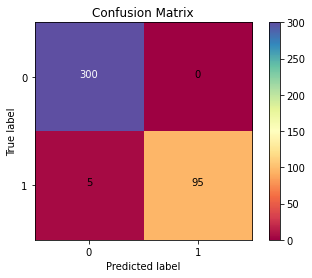

In [30]:
val_preds = rf.predict(X_val)
Accuracy = metrics.accuracy_score(y_val, val_preds)
confusion_matrix = metrics.confusion_matrix(y_val, val_preds)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

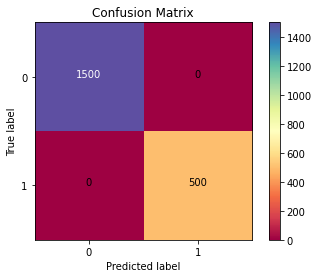

In [31]:
t_preds = rf.predict(X)
Accuracy = metrics.accuracy_score(y, t_preds)
confusion_matrix = metrics.confusion_matrix(y, t_preds)
cmap = plt.get_cmap('Spectral')
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0,1]
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,format(confusion_matrix[i][j]),horizontalalignment='center',color='white' if confusion_matrix[i][j]>confusion_matrix.max()/2 else 'black')
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [20,30,40,50],
    'subsample': [0.2,0.3,0.4,0.5,0.6],
    'max_depth': [5,6,7,8,9,10],
   
}
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_train_pred = best_rf.predict(X)
y_val_pred = best_rf.predict(X_val)

train_accuracy = accuracy_score(y, y_train_pred)
train_precision = precision_score(y, y_train_pred)
train_recall = recall_score(y, y_train_pred)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)

print("Training accuracy:", train_accuracy)
print("Training precision:", train_precision)
print("Training recall:", train_recall)

print("Validation accuracy:", val_accuracy)
print("Validation precision:", val_precision)
print("Validation recall:", val_recall)

In [34]:
def process(folder_path):
    label_folders = {'person': 1, 'airplane': 2, 'car': 0, 'dog': 3}
    data=[]
    #Main folder which contains 4 subfolders
    for folder in os.listdir(folder_path):
        if folder in label_folders:
            label = label_folders[folder]
            folder_images = os.listdir(os.path.join(folder_path, folder))
            for image_name in folder_images:
                if not image_name.startswith('.') and image_name.endswith(('png')):
                    image_path = os.path.join(folder_path, folder, image_name)
                    image = cv2.imread(image_path)
                    if image is not None:
                        data.append([image,label])
                    else:
                        print("Could not read image: " + image_path)
    df = pd.DataFrame()
    for i in range(len(data)):
        row = data[i][0].reshape(1,-1)
        row = row.flatten()
        row = np.append(row,data[i][1])
        df = df.append(pd.Series(row), ignore_index=True)
    X = df.iloc[:,:-1]
    y = df[3072]
    return X,y

In [35]:
X,y=process('/Users/valayaramchandani/Downloads/trainpics')

/var/folders/8v/4n20m59n1z7g8vbcnjym5g_r0000gn/T/ipykernel_96724/2656463615.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(row), ignore_index=True)
/var/folders/8v/4n20m59n1z7g8vbcnjym5g_r0000gn/T/ipykernel_96724/2656463615.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(row), ignore_index=True)


In [36]:
X

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,68,65,67,70,66,71,71,67,73,73,...,132,130,126,131,130,126,131,130,126,131
1,53,58,57,47,51,50,63,66,66,42,...,151,130,144,156,129,143,155,128,142,154
2,51,83,76,58,97,89,67,108,100,60,...,155,141,143,153,143,146,155,145,148,157
3,203,200,202,205,202,204,207,202,204,206,...,58,72,72,72,87,87,87,115,113,115
4,44,59,78,42,56,74,39,53,72,48,...,23,22,21,21,21,21,21,20,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,93,67,43,102,91,73,143,115,89,152,...,73,146,109,74,143,108,74,144,107,73
1996,155,120,54,158,112,59,148,122,70,150,...,122,171,144,117,167,140,113,162,140,112
1997,102,108,107,103,109,104,111,112,104,109,...,118,115,120,118,115,120,118,115,120,118
1998,210,162,118,208,163,122,208,163,125,213,...,112,208,156,111,209,159,115,210,159,115


In [37]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1995    2
1996    2
1997    2
1998    2
1999    2
Name: 3072, Length: 2000, dtype: int64

In [38]:
def testprocess(folder_path):
    image_size = (32, 32)

    data = []
    test_image_ids = []

    # Loop through all the image files in the folder
    for filename in os.listdir(folder_path):
            # Check if the file is an image
            if filename.endswith(('jpeg', 'png', 'jpg')):
                    # Read the image file
                    image_id = filename.split(".")[0]
                    test_image_ids.append(image_id)
                    img = cv2.imread(os.path.join(folder_path, filename))
                    if img is not None:
                            # Resize the image to 32x32x3
                            resized_img = cv2.resize(img, image_size)
                            # Append the resized image to the data list
                            data.append(resized_img)
                    else:
                        print(f"Could not read image: {filename}")
    df_test = pd.DataFrame()
    for i in range(len(data)):
        row = data[i].reshape(1,-1)
        row = row.flatten()
        df_test = df_test.append(pd.Series(row), ignore_index=True)
    return df_test, test_image_ids

In [39]:
df_test, test_image_ids=testprocess('/Users/valayaramchandani/Downloads/test_sample')

/var/folders/8v/4n20m59n1z7g8vbcnjym5g_r0000gn/T/ipykernel_96724/1847589202.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(pd.Series(row), ignore_index=True)
/var/folders/8v/4n20m59n1z7g8vbcnjym5g_r0000gn/T/ipykernel_96724/1847589202.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(pd.Series(row), ignore_index=True)


In [40]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,212,215,203,211,219,209,210,217,207,211,...,32,37,37,27,54,51,42,36,33,23
1,179,186,181,179,186,181,175,186,183,95,...,180,174,183,180,174,185,179,176,186,180
2,255,255,255,250,255,254,176,202,242,156,...,57,154,141,65,150,134,57,150,130,52
3,217,247,252,221,253,254,223,254,251,233,...,128,100,131,126,116,140,136,112,139,129
4,98,134,106,99,146,124,96,141,123,100,...,76,168,164,164,66,70,71,91,115,104
5,162,168,179,161,164,178,164,169,178,164,...,128,104,108,126,101,108,127,103,105,129
6,24,9,67,14,5,55,17,3,60,30,...,174,160,166,171,167,172,177,174,178,182
7,178,184,193,146,162,165,153,163,167,185,...,136,96,108,108,103,111,115,104,115,113
8,114,142,149,134,162,169,106,135,140,137,...,110,94,133,135,110,148,149,128,165,165
9,164,118,54,166,119,57,163,116,54,166,...,93,153,128,96,154,129,97,150,127,95


In [41]:
test_image_ids

['img_10',
 'img_1',
 'img_11',
 'img_13',
 'img_2',
 'img_3',
 'img_12',
 'img_16',
 'img_7',
 'img_6',
 'img_17',
 'img_15',
 'img_4',
 'img_5',
 'img_14',
 'img_8',
 'img_9',
 'img_18']